# PUNTO 2 — ANÁLISIS EXPLORATORIO DE DATOS (EDA)

Objetivos:
- Mostrar distribuciones de variables.
- Generar estadísticos descriptivos.
- Calcular correlaciones entre variables numéricas.
- Analizar la relación entre variables predictoras y el target.

Cada bloque presenta la visualización/estadística seguida de una interpretación detallada.


### Carga y preparación de los datos  
Se importaron las librerías necesarias (pandas, numpy, matplotlib, seaborn) y se cargó el dataset de Alzheimer.  
También se identificaron las variables numéricas y categóricas, además de definir la variable objetivo (*Diagnosis*).  
Esto permite preparar el entorno para el análisis exploratorio.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)

# Cargar dataset
df = pd.read_csv("alzheimers_disease_data.csv")

TARGET = "Diagnosis"   # ajusta si el target tiene otro nombre

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if TARGET in num_cols: num_cols.remove(TARGET)
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

display(Markdown("### Primeras filas del dataset"))
display(df.head())



### Primeras filas del dataset

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### Distribuciones y estadísticos descriptivos  
Primero se analizó la distribución del *target* para verificar si existe un desbalance de clases.  
Luego se graficaron los histogramas de las variables numéricas, lo que ayuda a detectar sesgos, valores extremos y posibles transformaciones necesarias.  
Finalmente, se calcularon los estadísticos descriptivos (media, mediana, desviación estándar, etc.), que muestran los rangos y la variabilidad de los datos.


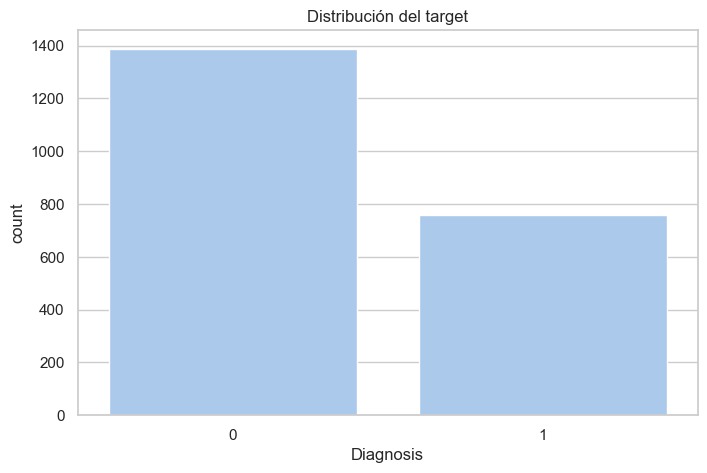

**Interpretación:** Si una clase es mucho mayor que la otra → dataset desbalanceado, se necesitan métricas más robustas que accuracy.

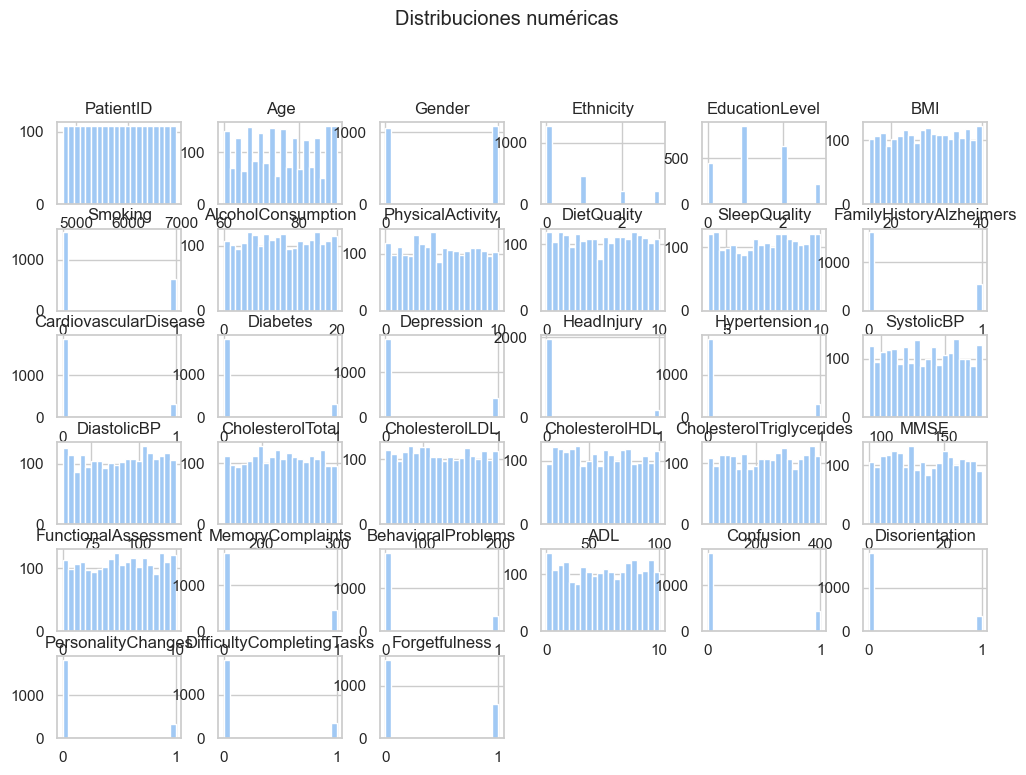

**Interpretación:** Se observan sesgos y posibles outliers → importante considerar escalado o transformaciones.

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


**Interpretación:** Variables con alta desviación estándar o rango grande pueden dominar modelos basados en distancias (ej. kNN).

In [17]:
# Distribución del target
sns.countplot(x=TARGET, data=df)
plt.title("Distribución del target")
plt.show()
display(Markdown("**Interpretación:** Si una clase es mucho mayor que la otra → dataset desbalanceado, se necesitan métricas más robustas que accuracy."))

# Histogramas variables numéricas
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribuciones numéricas", y=1.02)
plt.show()
display(Markdown("**Interpretación:** Se observan sesgos y posibles outliers → importante considerar escalado o transformaciones."))

# Estadísticos descriptivos
desc = df[num_cols].describe().T
display(desc)
display(Markdown("**Interpretación:** Variables con alta desviación estándar o rango grande pueden dominar modelos basados en distancias (ej. kNN)."))


### Correlaciones entre variables  
Se construyó una matriz de correlación para las variables numéricas y se visualizó con un mapa de calor.  
Esto permite detectar relaciones lineales fuertes (positivas o negativas) que pueden indicar multicolinealidad.  
También se listaron los pares de variables con correlaciones altas, lo cual ayuda a decidir si alguna debería ser eliminada o combinada en el preprocesamiento.


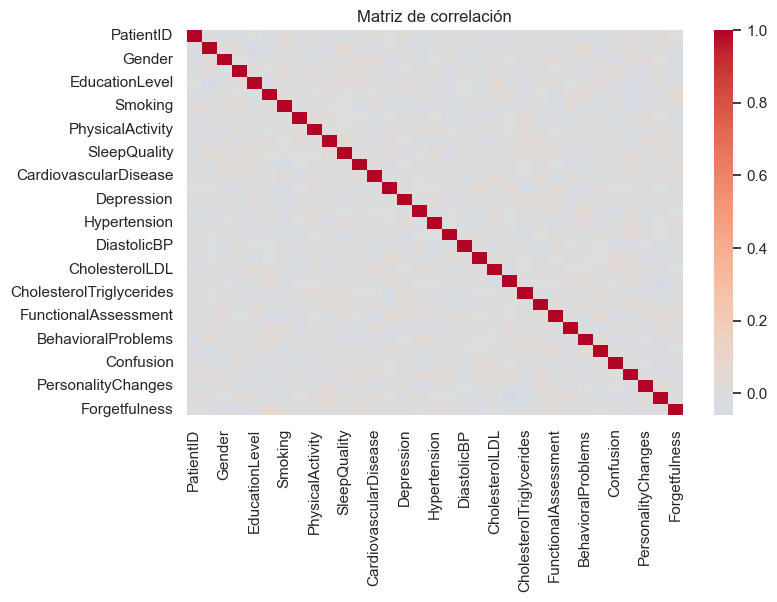

,Var1,Var2,Corr


**Interpretación:** Pares con correlación alta indican multicolinealidad → considerar eliminar o combinar variables.

In [18]:
# Heatmap correlaciones numéricas
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

# Pares con correlación alta
high_corr = [(c1,c2,corr.loc[c1,c2]) for i,c1 in enumerate(num_cols) for c2 in num_cols[i+1:] if abs(corr.loc[c1,c2])>=0.7]
display(pd.DataFrame(high_corr, columns=["Var1","Var2","Corr"]))
display(Markdown("**Interpretación:** Pares con correlación alta indican multicolinealidad → considerar eliminar o combinar variables."))


### Relación entre variables predictoras y el target  
Se analizaron las variables numéricas más correlacionadas con el *Diagnosis* mediante boxplots, mostrando diferencias en medianas y distribución entre clases.  
También se exploraron variables categóricas con gráficos de barras para ver la proporción de diagnósticos en cada categoría.  
Este análisis permite identificar qué variables son más relevantes para predecir la enfermedad.


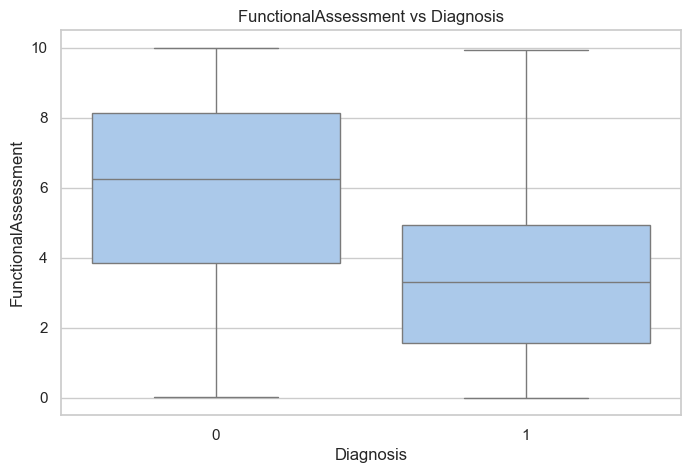

**Interpretación:** Diferencias claras en la mediana de FunctionalAssessment entre clases → variable con poder predictivo.

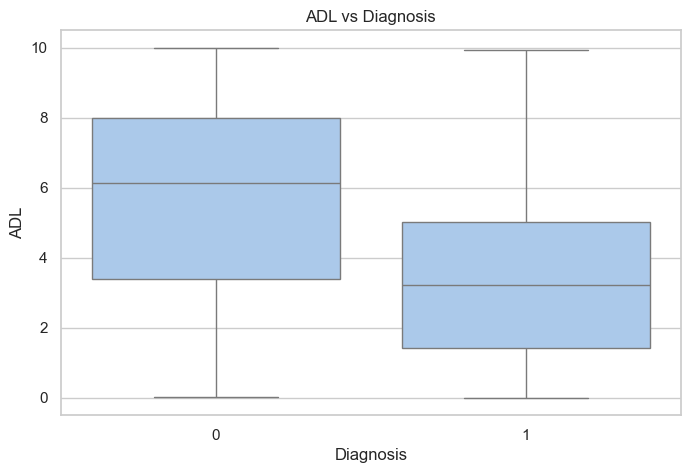

**Interpretación:** Diferencias claras en la mediana de ADL entre clases → variable con poder predictivo.

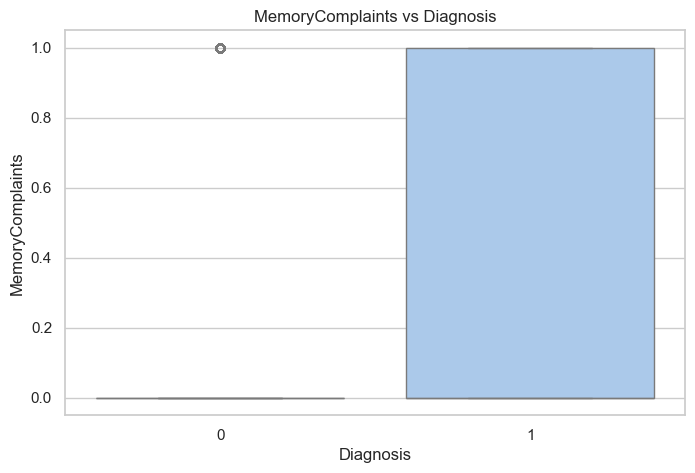

**Interpretación:** Diferencias claras en la mediana de MemoryComplaints entre clases → variable con poder predictivo.

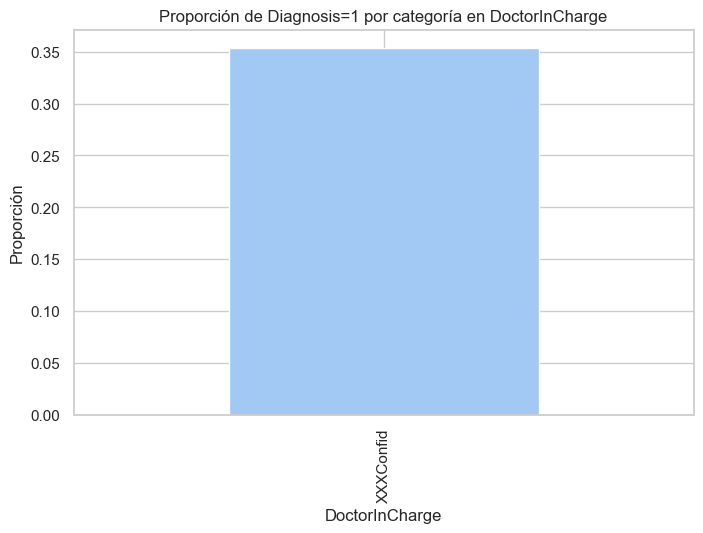

**Interpretación:** Si las proporciones varían entre categorías, DoctorInCharge aporta información discriminativa.

In [19]:
# Variables numéricas más correlacionadas con el target
corr_with_target = df[num_cols+[TARGET]].corr()[TARGET].drop(TARGET).abs().sort_values(ascending=False)
top_num = corr_with_target.head(3).index.tolist()

for col in top_num:
    sns.boxplot(x=TARGET, y=col, data=df)
    plt.title(f"{col} vs {TARGET}")
    plt.show()
    display(Markdown(f"**Interpretación:** Diferencias claras en la mediana de {col} entre clases → variable con poder predictivo."))

# Relación categóricas vs target (proporción)
for col in cat_cols[:3]:
    prop = df.groupby(col)[TARGET].mean()
    prop.plot(kind="bar")
    plt.title(f"Proporción de {TARGET}=1 por categoría en {col}")
    plt.ylabel("Proporción")
    plt.show()
    display(Markdown(f"**Interpretación:** Si las proporciones varían entre categorías, {col} aporta información discriminativa."))
